In [95]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib as plt

In [96]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mrcnn.model import mold_image
from mrcnn.model import MaskRCNN
from numpy import expand_dims
from doggosutils import PredictionConfig, DoggosDataset
from PIL import Image as im 

In [97]:
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model.load_weights("mask_rcnn_doggos_cfg_0007.h5", by_name=True)
model2 = load_model('modelcool30.h5')

In [101]:
img_path = r'dg.jpg'
image_all = plt.imread(img_path)    
scaled_image = mold_image(image_all, cfg)
sample = expand_dims(scaled_image, 0)
yhat = model.detect(sample, verbose=0)[0]
yhat['rois']=[e for e in yhat['rois']][0]
y1, x1, y2, x2 =yhat['rois']
plt.imsave('testphoto.jpg', image_all[int(y1):int(y2), int(x1):int(x2), :])

In [102]:
img = image.load_img('testphoto.jpg', target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
preds = model2.predict(img_tensor)
x = np.argmax(preds)

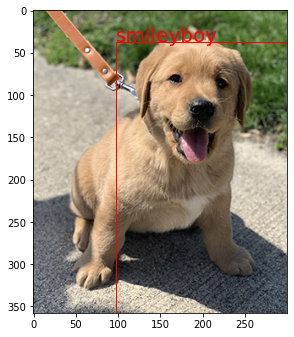

In [103]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.imshow(image_all)
rect = Rectangle((x1, y1), width, height, fill=False, color='red')
ax.add_patch(rect)
categ = ["angryboy", "goodboy", 'sleepyboy', 'smileyboy']
plt.text(x1, y1,categ[x], color='red', size=20)
plt.show()